# Chi2 test on cathegorical data

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder

## Loading data

In [55]:
path_file = 'clusters_FAMD.csv'
data = pd.read_csv(path_file, index_col=0)
data.head()

,state,arrears_days,total_paid,Monto Acumulado,Uso de los recursos,Plazo,Sector,Ingresos,Ubicación,Estrato Mínimo,...,Edad empresarios,Activador,Número de accionistas,Impacto,Acceso previso a la banca,# Empleados,Mujeres empresarias,Mujeres en cargos directivos,cluster_id_2,cluster_id_3
0,PAID,17,147915805,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,...,45,Internet,2,No,Si,16,No,2,1,0
1,PAID,23,91852726,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,...,45,Internet,2,No,Si,16,No,2,1,1
2,PAID,14,15211138,50000000,KT - EX,13 a 24 meses,Servicios,Seed,Medellín,3,...,32,SocialNetworks,3,No,Si,3,No,0,1,1
3,PAID,64,8713879,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,...,44,CreditProfessionalContact,2,No,Si,5,No,0,1,1
4,PAID,64,8102608,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,...,44,CreditProfessionalContact,2,No,Si,5,No,0,1,1


In [56]:
data.columns

Index(['state', 'arrears_days', 'total_paid', 'Monto Acumulado',
       'Uso de los recursos', 'Plazo', 'Sector', 'Ingresos', 'Ubicación',
       'Estrato Mínimo', 'Procesos judiciales', 'Alertas',
       'Score Bureau Empresa', 'Huellas de Consulta', 'Website empresa',
       'Instagram empresa', 'LinkedIn empresa', 'LinkedIn empresarios',
       'Edad empresarios', 'Activador', 'Número de accionistas', 'Impacto',
       'Acceso previso a la banca', '# Empleados', 'Mujeres empresarias',
       'Mujeres en cargos directivos', 'cluster_id_2', 'cluster_id_3'],
      dtype='object')

In [57]:
drop_columns = ['arrears_days', 'total_paid', 'Monto Acumulado',
                'Score Bureau Empresa',
                'Huellas de Consulta', 'Edad empresarios', 'Número de accionistas',
                '# Empleados', 'Mujeres en cargos directivos', 'cluster_id_2', 'cluster_id_3']
data = data.drop(columns=drop_columns)
data.head()

,state,Uso de los recursos,Plazo,Sector,Ingresos,Ubicación,Estrato Mínimo,Procesos judiciales,Alertas,Website empresa,Instagram empresa,LinkedIn empresa,LinkedIn empresarios,Activador,Impacto,Acceso previso a la banca,Mujeres empresarias
0,PAID,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,Si,Si,Si,Si,Internet,No,Si,No
1,PAID,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,Si,Si,Si,Si,Internet,No,Si,No
2,PAID,KT - EX,13 a 24 meses,Servicios,Seed,Medellín,3,No,No,Si,No,Si,No,SocialNetworks,No,Si,No
3,PAID,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,Si,No,Si,Si,CreditProfessionalContact,No,Si,No
4,PAID,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,Si,No,Si,Si,CreditProfessionalContact,No,Si,No


In [58]:
data_dum = pd.get_dummies(data, drop_first=True)

In [59]:
data_dum.head(10)

,Estrato Mínimo,state_PAID,Uso de los recursos_KT - CO,Uso de los recursos_KT - EX,Uso de los recursos_SP,Plazo_25 a 36 meses,Plazo_Menos de 12 meses,Plazo_Más de 37 meses,Sector_Industria,Sector_Servicios,...,Activador_FriendOrColleague,Activador_Internet,Activador_Newspapers,Activador_Other,Activador_Referrer,Activador_RutaN,Activador_SocialNetworks,Impacto_Si,Acceso previso a la banca_Si,Mujeres empresarias_Si
0,5,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,5,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,3,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,4,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,4,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,5,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
8,5,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
9,5,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
print(data_dum.shape)
print("The data set contains: {} rows and {} columns".format(data.shape[0], data.shape[1]))
print("Features after get_dummies:\n", list(data_dum.columns))

(577, 51)
The data set contains: 577 rows and 17 columns
Features after get_dummies:
 ['Estrato Mínimo', 'state_PAID', 'Uso de los recursos_KT - CO', 'Uso de los recursos_KT - EX', 'Uso de los recursos_SP', 'Plazo_25 a 36 meses', 'Plazo_Menos de 12 meses', 'Plazo_Más de 37 meses', 'Sector_Industria', 'Sector_Servicios', 'Ingresos_Scale Up', 'Ingresos_Seed', 'Ingresos_Venture', 'Ubicación_Barranquilla', 'Ubicación_Bello', 'Ubicación_Bogotá D.C.', 'Ubicación_Bucaramanga', 'Ubicación_Cali', 'Ubicación_Cartagena de indias', 'Ubicación_Copacabana', 'Ubicación_Envigado', 'Ubicación_Itagüí', 'Ubicación_La Ceja', 'Ubicación_La Estrella', 'Ubicación_Manizales', 'Ubicación_Marinilla', 'Ubicación_Medellín', 'Ubicación_Neiva', 'Ubicación_Pereira', 'Ubicación_Rionegro', 'Ubicación_Sabaneta', 'Ubicación_Santa Marta', 'Procesos judiciales_Si', 'Alertas_Si', 'Website empresa_Si', 'Instagram empresa_Si', 'LinkedIn empresa_Si', 'LinkedIn empresarios_Si', 'Activador_CreditProfessionalContact', 'Activador

In [61]:
X = data_dum.drop('state_PAID', axis=1) # input categorical features
y = data_dum['state_PAID'] # target variable

In [62]:
# categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)
# print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Estrato Mínimo: 2.640069
 Uso de los recursos_KT - CO: 0.527883
 Uso de los recursos_KT - EX: 0.067197
 Uso de los recursos_SP: 3.775586
 Plazo_25 a 36 meses: 0.873849
 Plazo_Menos de 12 meses: 11.139666
 Plazo_Más de 37 meses: 6.569040
 Sector_Industria: 0.599684
 Sector_Servicios: 0.843147
 Ingresos_Scale Up: 0.383458
 Ingresos_Seed: 1.390526
 Ingresos_Venture: 0.022979
 Ubicación_Barranquilla: 0.051322
 Ubicación_Bello: 0.555256
 Ubicación_Bogotá D.C.: 0.081789
 Ubicación_Bucaramanga: 0.534340
 Ubicación_Cali: 6.940955
 Ubicación_Cartagena de indias: 0.178113
 Ubicación_Copacabana: 1.800971
 Ubicación_Envigado: 2.537359
 Ubicación_Itagüí: 0.468358
 Ubicación_La Ceja: 1.800971
 Ubicación_La Estrella: 11.489395
 Ubicación_Manizales: 0.199569
 Ubicación_Marinilla: 0.555256
 Ubicación_Medellín: 2.498167
 Ubicación_Neiva: 0.555256
 Ubicación_Pereira: 0.007332
 Ubicación_Rionegro: 0.007332
 Ubicación_Sabaneta: 0.598707
 Ubicación_Santa Marta: 1.800971
 Procesos judiciales_Si: 0.012513
 A

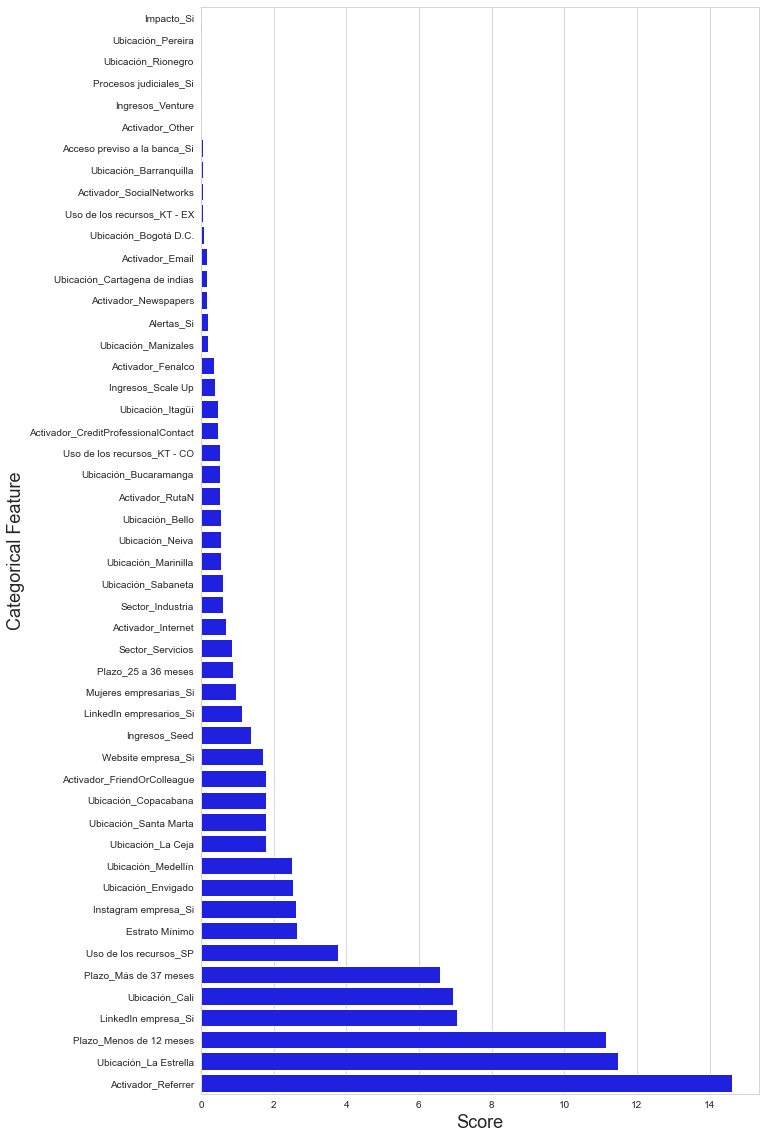

In [72]:
# plot the scores
plt.figure(figsize=(10,20))
datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)
sns.barplot(datset['scores'], datset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [73]:
## scikit-learn OrdinalEncoder() / LabelEncoder()

In [84]:
X1 = data.drop('state', axis=1) # input features
y1 = data['state'] # target variable

In [85]:
# prepare input features
oe = OrdinalEncoder()
oe.fit(X1)
X_enc = oe.transform(X1)

# prepare target variable
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

In [66]:
# feature selection
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)
# print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

 Uso de los recursos: 5.239301
 Plazo: 6.451911
 Sector: 0.752762
 Ingresos: 1.263398
 Ubicación: 4.548766
 Estrato Mínimo: 4.736862
 Procesos judiciales: 0.012513
 Alertas: 0.194006
 Website empresa: 1.705669
 Instagram empresa: 2.616008
 LinkedIn empresa: 7.046264
 LinkedIn empresarios: 1.121724
 Activador: 2.353568
 Impacto: 0.004490
 Acceso previso a la banca: 0.045103
 Mujeres empresarias: 0.977772


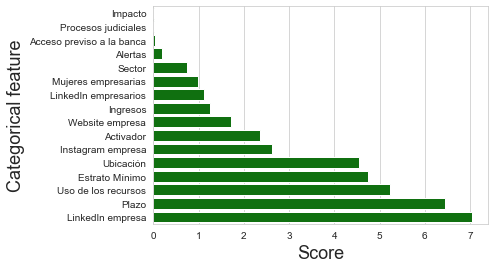

In [67]:
# plot the scores of features
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[ range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)
sns.barplot(datset1['scores'], datset1['feature'], color='green')
sns.set_style('whitegrid')
plt.ylabel('Categorical feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [75]:
X1 = data.drop('state', axis=1) # input features
y1 = data['state'] # target variable

In [93]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Uso de los recursos        577 non-null    object
 1   Plazo                      577 non-null    object
 2   Sector                     577 non-null    object
 3   Ingresos                   577 non-null    object
 4   Ubicación                  577 non-null    object
 5   Estrato Mínimo             577 non-null    int64 
 6   Procesos judiciales        577 non-null    object
 7   Alertas                    577 non-null    object
 8   Website empresa            577 non-null    object
 9   Instagram empresa          577 non-null    object
 10  LinkedIn empresa           577 non-null    object
 11  LinkedIn empresarios       577 non-null    object
 12  Activador                  577 non-null    object
 13  Impacto                    577 non-null    object
 14  Acceso pre

In [91]:
# prepare input features
categorical = data.select_dtypes(include='object')
label_encoder = LabelEncoder()
categorical = label_encoder.fit(categorical)
#oe = LabelEncoder()
#X_enc = oe.fit_transform(X1.values)

# prepare target variable
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

ValueError: y should be a 1d array, got an array of shape (577, 16) instead.

In [66]:
# feature selection
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)
# print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

 Uso de los recursos: 5.239301
 Plazo: 6.451911
 Sector: 0.752762
 Ingresos: 1.263398
 Ubicación: 4.548766
 Estrato Mínimo: 4.736862
 Procesos judiciales: 0.012513
 Alertas: 0.194006
 Website empresa: 1.705669
 Instagram empresa: 2.616008
 LinkedIn empresa: 7.046264
 LinkedIn empresarios: 1.121724
 Activador: 2.353568
 Impacto: 0.004490
 Acceso previso a la banca: 0.045103
 Mujeres empresarias: 0.977772


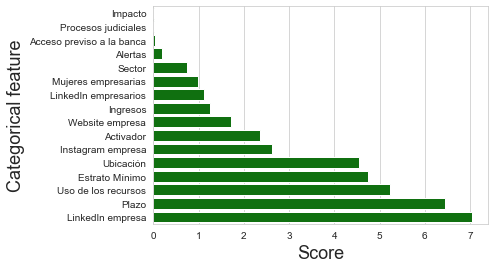

In [67]:
# plot the scores of features
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[ range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)
sns.barplot(datset1['scores'], datset1['feature'], color='green')
sns.set_style('whitegrid')
plt.ylabel('Categorical feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()